In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [10]:
##os.listdir('/kaggle/input/heart-failure-prediction')

In [11]:
data = pd.read_csv('/content/heart_failure_clinical_records.csv')
df = data  # Creating a copy of original df is always a good practice

In [12]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Insight 1 => No null values present

In [15]:
#Lets describe the data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [16]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

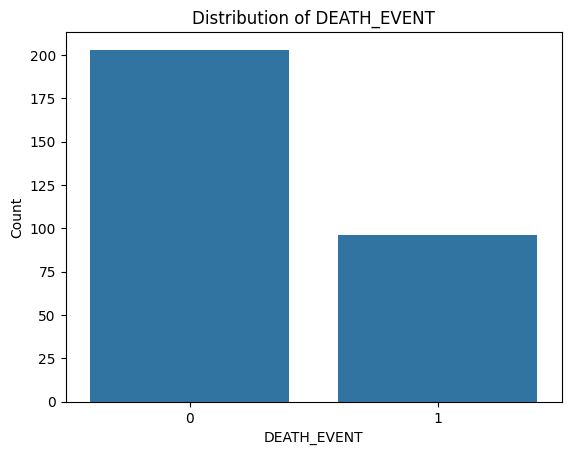

In [17]:
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')

plt.show()

# Insight2 => We can see that this is IMBALANCED DATASET.
## There are so much techniques of handeling imbalanced data. For this case I'm doing SMOTE

In [18]:
oversample = SMOTE()
X, y = oversample.fit_resample(df.drop('DEATH_EVENT',axis=1),df['DEATH_EVENT'])

In [19]:
df1_ = pd.DataFrame(X,columns = df.drop('DEATH_EVENT',axis=1).columns)
df2_ = pd.DataFrame(y, columns = ['DEATH_EVENT'])

In [20]:
after_smote_df = pd.concat([df1_, df2_], axis=1)

In [21]:
print("INITIAL DATA SHAPE : ", df.shape)
print("AFTER SMOTE SHAPE : ", after_smote_df.shape)
# Now the data is balanced..we are keeping the original data as we will se the model performace with raw data as well.

INITIAL DATA SHAPE :  (299, 13)
AFTER SMOTE SHAPE :  (406, 13)


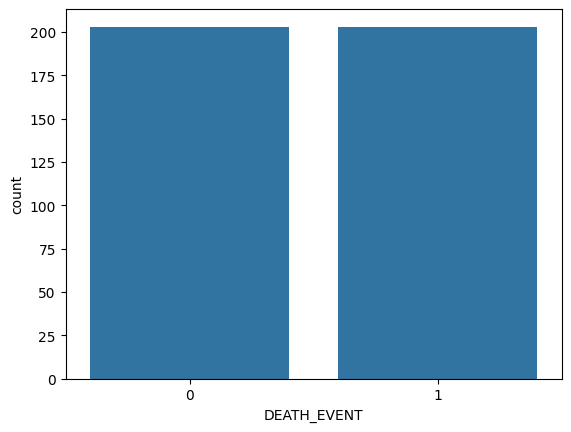

In [22]:
sns.countplot(x= 'DEATH_EVENT',data = after_smote_df)
plt.show()

In [23]:
# Creating a copy of smote_df
fdf = after_smote_df

In [24]:
fdf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [25]:
# Checking for Duplicates
fdf.duplicated().sum()

0

# Now let's check the distribution, Outliers, Correlation between the Independent Variables
### For Distribution = Histogram is used
### For Outliers = Boxplot is used
### For Correlation = ScatterPlot/Heatmap is used

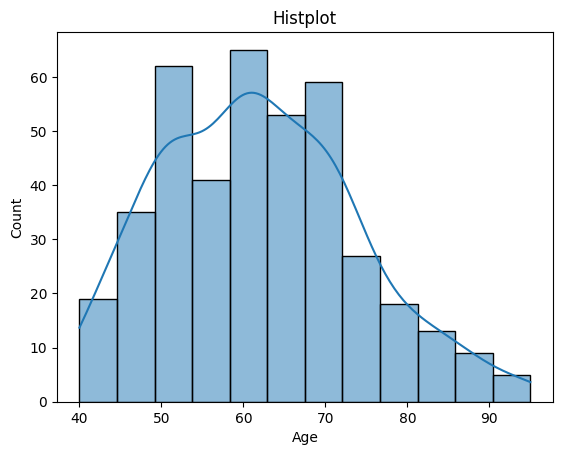

In [26]:
sns.histplot(data = fdf, x='age',kde=True)
plt.title('Histplot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [27]:
def draw_hist(df:pd.DataFrame):
    fig, axs = plt.subplots(4, 3, figsize = (15, 12))

    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 3
        col_index = i % 3
        sns.histplot(x=column, data=df, ax=axs[row_index, col_index], alpha=0.5, kde=True)
        axs[row_index, col_index].set_title(f'Hist Plot of {column}')
    plt.tight_layout()
    plt.show()


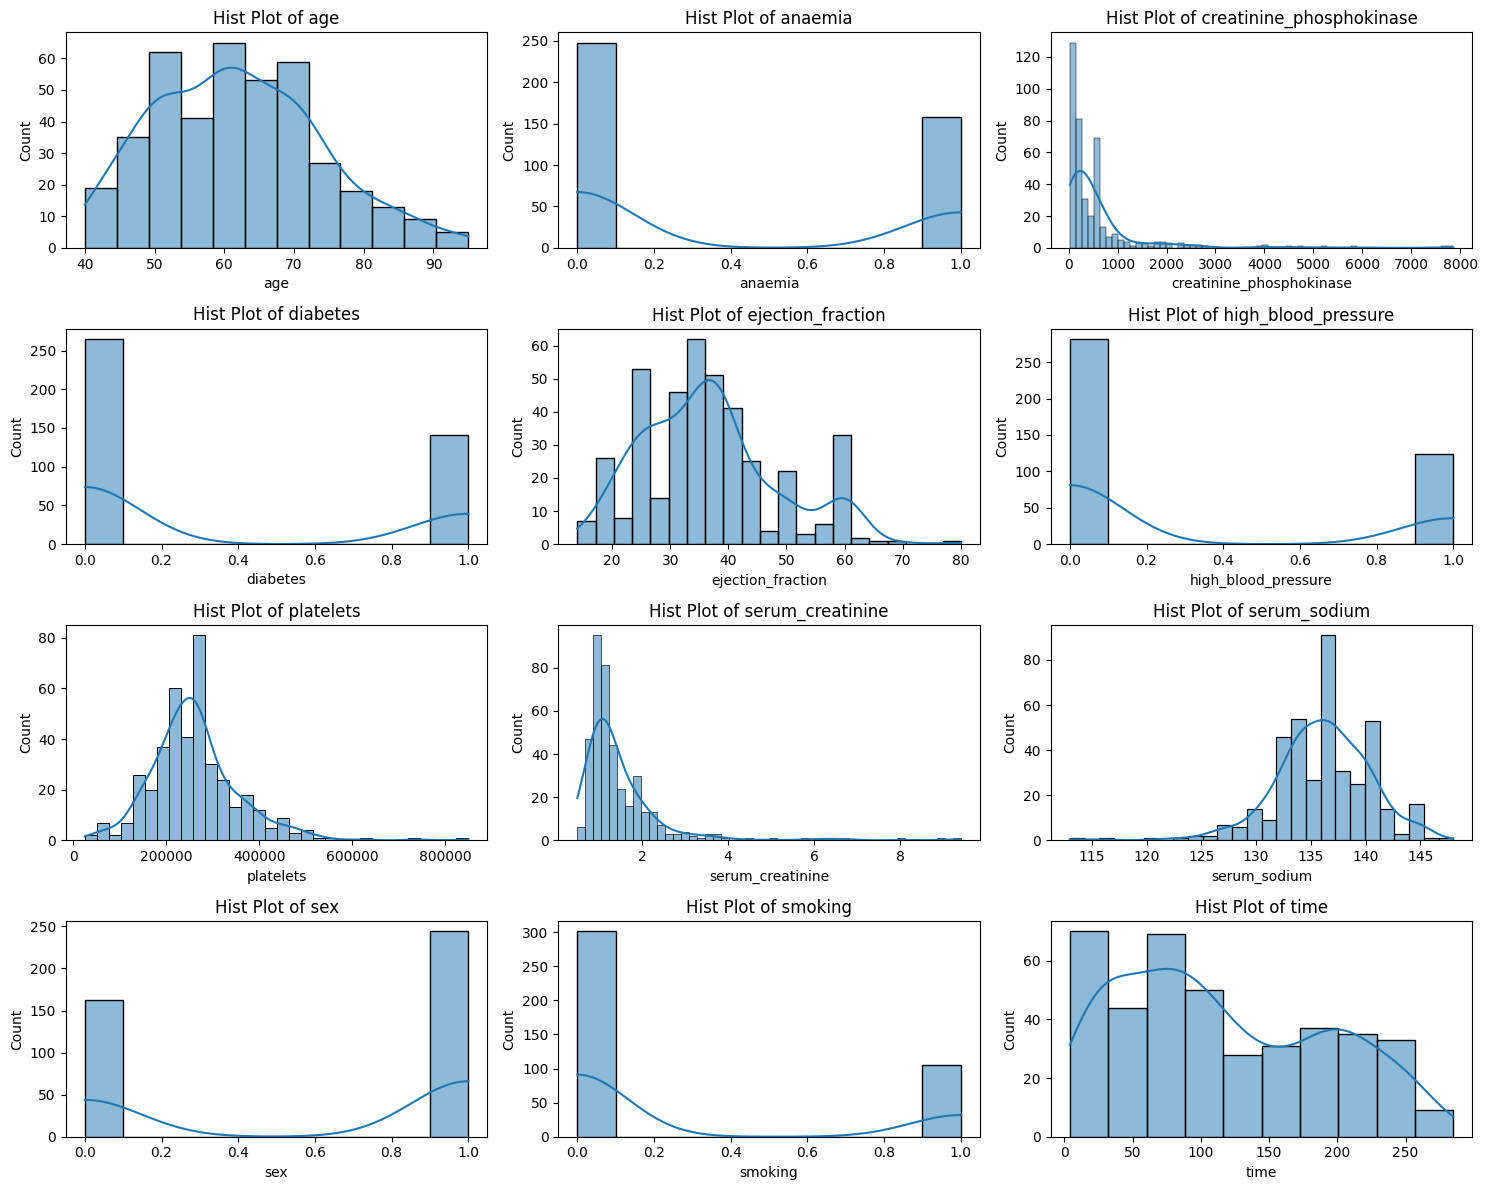

In [28]:
draw_hist(fdf)

In [29]:
# Or we can simply do df.skew() to check skewness
fdf.skew()

age                         0.386023
anaemia                     0.456349
creatinine_phosphokinase    4.516651
diabetes                    0.643870
ejection_fraction           0.631440
high_blood_pressure         0.848068
platelets                   1.277879
serum_creatinine            4.041301
serum_sodium               -0.727284
sex                        -0.413972
smoking                     1.106592
time                        0.380033
DEATH_EVENT                 0.000000
dtype: float64

# Insight 3 => We can see that there are columns which have only 0 and 1 like 'sex', 'smoking' etc. And many of the features are right skewed and only 'serum_odium' is Left Skewed

In [30]:
# We will deal with skeweness later first viaulize the outliers
def show_boxplots(df:pd.DataFrame):
    fig, axs = plt.subplots(4, 3, figsize = (15, 12))

    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 3
        col_index = i % 3
        sns.boxplot(y=column, data=df, ax=axs[row_index, col_index])
        axs[row_index, col_index].set_title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

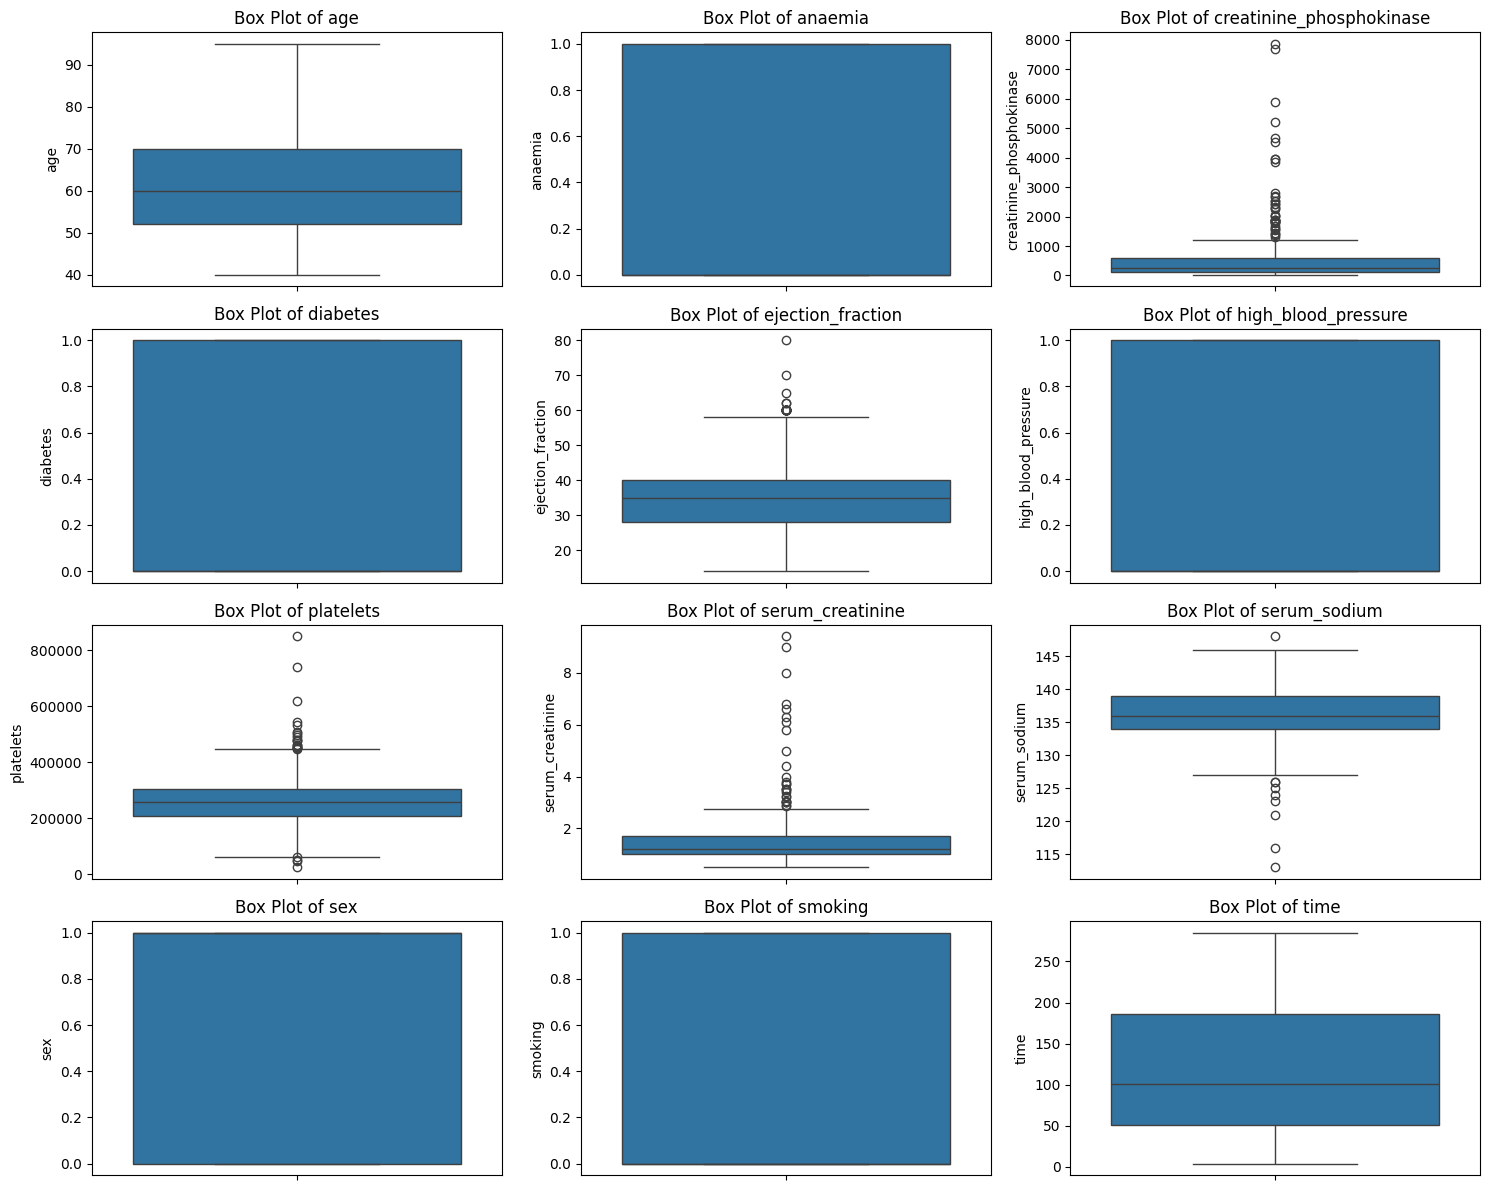

In [31]:
show_boxplots(fdf)

In [32]:
def get_iqr_thresholds(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_fence = q1 - 1.5 * IQR
    upper_fence = q3 + 1.5 * IQR
    return lower_fence, upper_fence

In [33]:
# Outliers are in 5 columns, we can get them in the following way using z-score
def get_outliers_count(df: pd.DataFrame):
    desc_df = df.describe()
    outliers_count = {}

    for column in df.columns[:-1]:


        lower_fence, upper_fence = get_iqr_thresholds(df,column)

        # Count outliers in the column
        outlier_count = df[(df[column] < lower_fence) | (df[column] > upper_fence)][column].count()

        outliers_count[column] = outlier_count


    return outliers_count

In [34]:
outliers = get_outliers_count(fdf)
outliers
# You can verify these in the plot as well

{'age': 0,
 'anaemia': 0,
 'creatinine_phosphokinase': 38,
 'diabetes': 0,
 'ejection_fraction': 37,
 'high_blood_pressure': 0,
 'platelets': 24,
 'serum_creatinine': 26,
 'serum_sodium': 9,
 'sex': 0,
 'smoking': 0,
 'time': 0}

## We can remove the outliers in ejection_fraction as they are very less.Hence, But i am imputing theri values with MEDIAN

In [35]:
fdf.shape

(406, 13)

In [36]:
# Replacing with median as outliers are in numerical features
def impute_outliers_with_median(df: pd.DataFrame, outliers_count_dict: dict):
    for column, outlier_count in outliers_count_dict.items():
        if outlier_count > 2:
            lower_fence, upper_fence = get_iqr_thresholds(df,column)
            # Impute outliers with median
            median_value = df[column].median()

            # Replace outliers in the entire DataFrame with median for the specified column
            df[column] = np.where((df[column] < lower_fence) | (df[column] > upper_fence), median_value, df[column])

    return df

In [37]:
fdf = impute_outliers_with_median(fdf, outliers)

In [38]:
get_outliers_count(fdf)

{'age': 0,
 'anaemia': 0,
 'creatinine_phosphokinase': 0,
 'diabetes': 0,
 'ejection_fraction': 1,
 'high_blood_pressure': 0,
 'platelets': 19,
 'serum_creatinine': 22,
 'serum_sodium': 0,
 'sex': 0,
 'smoking': 0,
 'time': 0}

In [39]:
fdf.skew()

age                         0.386023
anaemia                     0.456349
creatinine_phosphokinase    1.186849
diabetes                    0.643870
ejection_fraction           0.152256
high_blood_pressure         0.848068
platelets                   0.137108
serum_creatinine            1.080495
serum_sodium                0.036171
sex                        -0.413972
smoking                     1.106592
time                        0.380033
DEATH_EVENT                 0.000000
dtype: float64

# Checnking the correlation

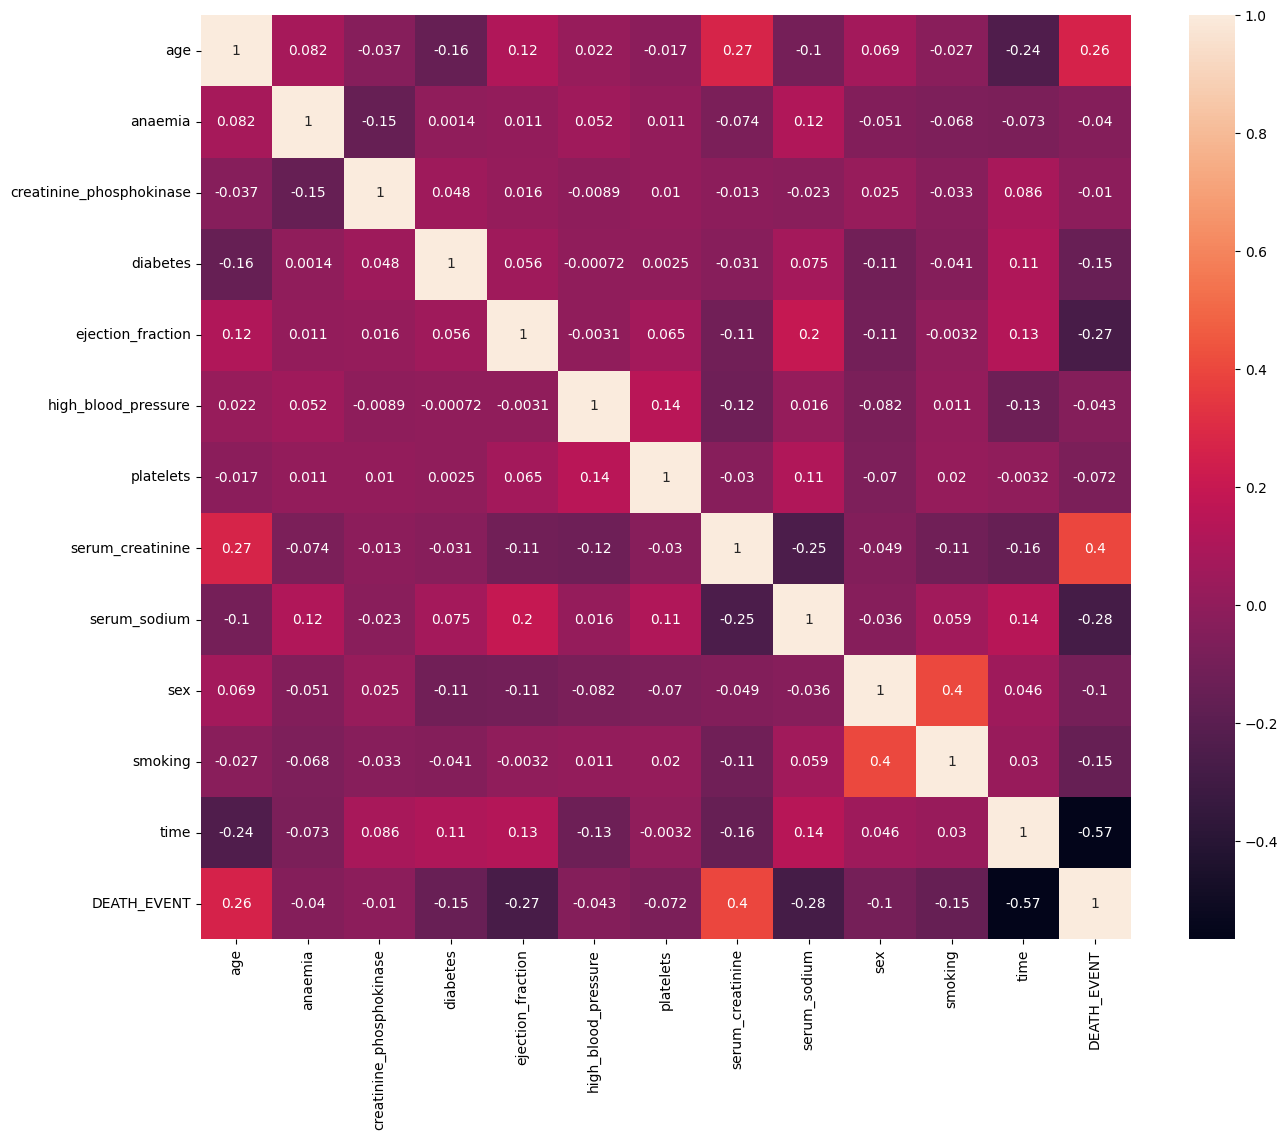

In [40]:
plt.figure(figsize=(15, 12))
sns.heatmap(fdf.corr(method='pearson'),annot=True)
plt.show()

# Now Training

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

In [42]:
X_train,X_test,y_train,y_test = train_test_split(fdf.drop('DEATH_EVENT',axis=1),fdf['DEATH_EVENT'],test_size=0.2,random_state=42)

In [43]:
scaler = StandardScaler()

In [44]:
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [45]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_scaled)
X_test_pca = pca.transform(x_test_scaled)

In [46]:
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [47]:
# Perform k-fold cross-validation before PCA
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores_before_pca = cross_val_score(rf_classifier, x_train_scaled, y_train, cv=kf)

In [48]:
# Print cross-validation scores
print(f'Cross-Validation Scores Before PCA: {cross_val_scores_before_pca}')
print(f'Mean Cross-Validation Score Before PCA: {np.mean(cross_val_scores_before_pca):.4f}')

Cross-Validation Scores Before PCA: [0.92307692 0.87692308 0.93846154 0.84615385 0.875     ]
Mean Cross-Validation Score Before PCA: 0.8919


In [49]:
# Perform k-fold cross-validation after PCA
cross_val_scores_after_pca = cross_val_score(rf_classifier, X_train_pca, y_train, cv=kf)

print(f'\nCross-Validation Scores After PCA: {cross_val_scores_after_pca}')
print(f'Mean Cross-Validation Score After PCA: {np.mean(cross_val_scores_after_pca):.4f}')


Cross-Validation Scores After PCA: [0.83076923 0.72307692 0.78461538 0.69230769 0.75      ]
Mean Cross-Validation Score After PCA: 0.7562


# Surely PCA is not good for small datasets

In [50]:
# Doing Hyperparameter tunning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [51]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=kf)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [52]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [53]:
print(best_params)
print(best_score)
print(grid_search.best_estimator_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.8919230769230768
RandomForestClassifier(random_state=42)


In [54]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(grid_search.best_estimator_, x_train_scaled, y_train, cv=kf)

In [55]:
cross_val_scores

array([0.92307692, 0.87692308, 0.93846154, 0.84615385, 0.875     ])

In [56]:
# Print cross-validation scores
print(f'Cross-Validation Scores After Tunning: {cross_val_scores}')
print(f'Mean Cross-Validation Score After Tunning: {np.mean(cross_val_scores):.4f}')

Cross-Validation Scores After Tunning: [0.92307692 0.87692308 0.93846154 0.84615385 0.875     ]
Mean Cross-Validation Score After Tunning: 0.8919


In [57]:
best_rf_model = grid_search.best_estimator_

# Use the best model to make predictions on the test set (x_test_scaled)
y_pred = best_rf_model.predict(x_test_scaled)

In [58]:
accuracy_score(y_test,y_pred)

0.8658536585365854

# Training different - different Classifiers

In [60]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.2 MB/s eta 0:00:00


In [61]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [62]:
# Define classifiers and their respective parameter grids
classifiers = {
    'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [50, 100, 200]}),
    'GradientBoost': (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'XGBoost': (XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1.0, 10.0]}),
    'LGBM': (LGBMClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]})
}

In [63]:
# Perform grid search and cross-validation for each classifier
for clf_name, (clf, param_grid) in classifiers.items():
    print(f"Training and evaluating {clf_name}...")

    grid_search = GridSearchCV(clf, param_grid, cv=kf)

    grid_search.fit(x_train_scaled, y_train)

    cross_val_scores = cross_val_score(grid_search.best_estimator_, x_train_scaled, y_train, cv=kf)

    print(f"Cross-validation scores for {clf_name}:", cross_val_scores)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test_scaled)

    # Calculate and print the accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test set accuracy for {clf_name}: {accuracy}")
    print("\n")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

# Using Ensemble Technique

In [64]:
from sklearn.ensemble import VotingClassifier

# Define the base classifiers with their best hyperparameters
ada_best = AdaBoostClassifier(n_estimators=100)
gb_best = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
xgb_best = XGBClassifier(n_estimators=100, learning_rate=0.1)
lr_best = LogisticRegression(C=1.0)
cat_best = CatBoostClassifier(iterations=100, learning_rate=0.1)
lgbm_best = LGBMClassifier(n_estimators=100, learning_rate=0.1)
rforest_best = RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

# Create a list of tuples with classifier names and their instances
classifiers = [
    ('AdaBoost', ada_best),
    ('GradientBoost', gb_best),
    ('XGBoost', xgb_best),
    ('LogisticRegression', lr_best),
    ('LGBM', lgbm_best),
    ('CatBoost', cat_best),
    ('Rforset',rforest_best)
]

# Create a VotingClassifier
ensemble_classifier = VotingClassifier(estimators=classifiers, voting='hard')

ensemble_classifier.fit(x_train_scaled, y_train)

# Make predictions on the test set
ensemble_predictions = ensemble_classifier.predict(x_test_scaled)

# Calculate and print the accuracy of the ensemble on the test set
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Test Set Accuracy:", ensemble_accuracy)


[LightGBM] [Info] Number of positive: 162, number of negative: 162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

# Using Stacking (It is a type of ensembling the models)

In [65]:
from sklearn.ensemble import StackingClassifier

# Define the base classifiers with their best hyperparameters
ada_best = AdaBoostClassifier(n_estimators=100)
gb_best = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
xgb_best = XGBClassifier(n_estimators=100, learning_rate=0.1)
lr_best = LogisticRegression(C=1.0)
cat_best = CatBoostClassifier(iterations=100, learning_rate=0.1)
lgbm_best = LGBMClassifier(n_estimators=100, learning_rate=0.1)
rforest_best = RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

# Create a list of tuples with classifier names and their instances
base_classifiers = [
    ('AdaBoost', ada_best),
    ('GradientBoost', gb_best),
    ('XGBoost', xgb_best),
    ('LogisticRegression', lr_best),
    ('LGBM', lgbm_best),
    ('CatBoost', cat_best),
    ('Rforset', rforest_best)
]

# Create a StackingClassifier with a meta-classifier (Logistic Regression in this case)
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())

stacking_classifier.fit(x_train_scaled, y_train)

# Make predictions on the test set
stacking_predictions = stacking_classifier.predict(x_test_scaled)

# Calculate and print the accuracy of the stacking classifier on the test set
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print("Stacking Test Set Accuracy:", stacking_accuracy)


[LightGBM] [Info] Number of positive: 162, number of negative: 162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

# Hence After Stacking we get the best Model